In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt


# import the main class
from funcs.auroralring import AuroralRing

In [2]:

# inclination of rotation axis in radians with the right convention
i_rot = np.pi/2 - 60 * np.pi/180

# inclination of magnetic axis in radians relative to rotation axis
i_mag = 40 * np.pi/180

# rotation period in days
P_rot = 0.2

# stellar radius in solar radii
R_star = .2

# upper latitude of ring around magnetic axis in radians
PHI_max = 60 * np.pi/180

# lower latitude of ring around magnetic axis in radians
PHI_min = 55 * np.pi/180

# lower latitude must be smaller than upper latitude
assert PHI_min < PHI_max

In [3]:
# mid latitude of ring around magnetic axis in radians
mid_lat = (PHI_max + PHI_min) / 2

# width of ring around magnetic axis in radians
width = PHI_max - PHI_min

# rotational phase of the star in radians
alpha = np.pi / 3. 


# define the auroral ring
ring = AuroralRing(i_rot=i_rot, i_mag=i_mag, latitude=mid_lat,
                    width=width, Rstar=R_star, P_rot=P_rot, N=60, 
                     gridsize=int(6e5))



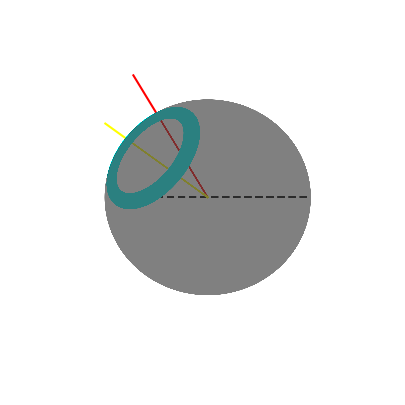

In [4]:
# plot the sphere with the auroral ring
fig, ax = ring.plot_setup_sphere()
ring.get_flux_numerically(alpha=alpha)
ring.plot_sphere_with_auroral_ring(ax, alpha=alpha, sphere_alpha=0.01, ring_alpha=1.)
ring.plot_layout_sphere(ax, view='observer left')

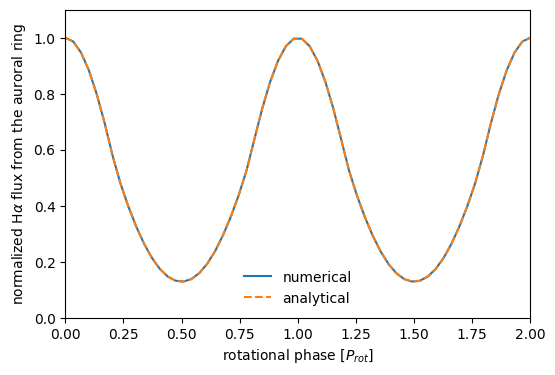

In [5]:
# plot the flux of the auroral ring as a function of rotational phase

# define rotational phases
alphas = np.linspace(0, 4*np.pi, 60)

# calculate the fluxes numerically and analytically
# NOTE: the foreshortening is a geometrical factor that assumes that the Halpha emission is optically thick
# set foreshortening=False to get the optically thin case
int_fluxes = [np.sum(ring.get_flux_numerically(alpha=alpha, normalize=False, foreshortening=True)) 
              for alpha in alphas]
int_fluxes_analytical = [np.sum(ring.get_flux_analytically(alpha=alpha, normalize=False, foreshortening=True)) 
                         for alpha in alphas]

# plot the fluxes
plt.figure(figsize=(6, 4))
plt.plot(alphas / 2 / np.pi, int_fluxes / np.max(int_fluxes))
plt.plot(alphas / 2 / np.pi, int_fluxes_analytical / np.max(int_fluxes_analytical), ls='--')
plt.xlabel(r'rotational phase [$P_{rot}$]')
plt.ylabel(r'normalized H$\alpha$ flux from the auroral ring')
plt.ylim(0,1.1)
plt.xlim(0,2)
plt.legend(['numerical', 'analytical'], frameon=False)


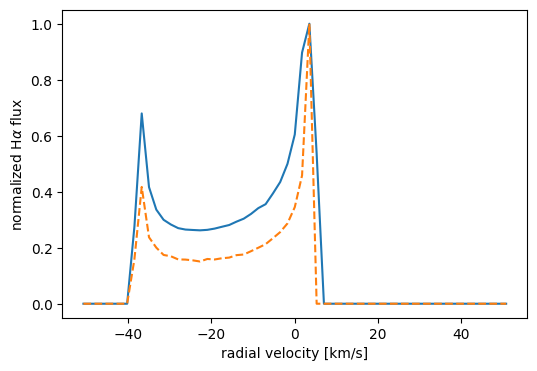

In [6]:
# plot an individual spectral line profile
plt.figure(figsize=(6, 4))

# rotational phase of the star in radians
alpha = np.pi / 4.

# get the numerical and analytical flux
flux_num = ring.get_flux_numerically(alpha=alpha, normalize=True, foreshortening=True)
flux_analytical = ring.get_flux_analytically(alpha=alpha, normalize=True, foreshortening=True)

# NOTE: the difference between the numerical and analytical fluxes is due to the fact that the numerical flux is
# calculated by summing the fluxes of all the grid cells, while the analytical flux is calculated by integrating
# the flux over the ring. The numerical flux is more accurate, but the analytical flux is faster to compute.
# The analytical solution assumes a infinitesimally thin ring, while the numerical solution uses a finite width ring.
# A thinner ring width will give a better agreement between the numerical and analytical fluxes.

# plot the fluxes
plt.plot(ring.v_mids, flux_num, label='numerical')
plt.plot(ring.v_mids, flux_analytical, label='analytical', ls='--')

plt.xlabel(r'radial velocity [km/s]')
plt.ylabel(r'normalized H$\alpha$ flux');